In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import pydot, graphviz 
import numpy as np
import pandas as pd

# Import datasets + simple exploration

In [2]:
# import inbuild fashion data from keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

In [18]:
# actual label names
label_names= {0:'T-shirt/top',
            1:'Trouser',
            2:'Pullover',
            3:'Dress',
            4:'Coat',
            5:'Sandal',
            6:'Shirt',
            7:'Sneaker',
            8:'Bag',
            9:'Ankle boot'}

In [4]:
X_train_full.dtype

dtype('uint8')

(<matplotlib.image.AxesImage at 0x2b5f1ef9648>,)

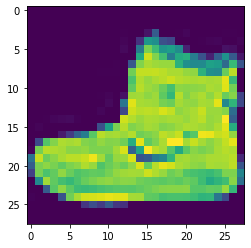

In [19]:
# show first image    
plt.imshow(X_train_full[0])

In [20]:
# label of the above image
label_names[y_train_full[0]]

'Ankle boot'

In [21]:
# there are 60000 images to train  and 10000 images to test
print('Training set dimensions: ',X_train_full.shape,y_train_full.shape)
print('Test set dimensions: ',X_test.shape,y_test.shape)

Training set dimensions:  (60000, 28, 28) (60000,)
Test set dimensions:  (10000, 28, 28) (10000,)


In [22]:
# each image has a 28x28 pixel dimension
# each pixel takes a value between 0 and 255
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

# Data Reshaping
- CNN requires data to be 3 dimensional, so this step reshapes dimension to 3

In [23]:
# that final '1' is the third dimension
X_train_full= X_train_full.reshape((60000,28,28,1))
X_test= X_test.reshape((10000,28,28,1))

# Data normalisation
- ensure data is of the same scale
- different from usual ML normalisations 

In [24]:
# the 255. ensures that output is all float
X_train_n=X_train_full/255.
X_test=X_test/255.

# split into training and validation sets
- validation set is used for parameter tuning and model evaluation
- test set is used for final evaluation of performance

In [25]:
# split using train_test_split function
X_train, X_valid, y_train, y_valid = train_test_split(X_train_n, y_train_full, test_size=(5000/60000), random_state=42)

In [26]:
# check dimensions
print('Training set Dimensions: \n\tX: {}\n\ty: {}'.format(X_train.shape,y_train.shape))
print('Validation set Dimensions: \n\tX: {}\n\ty: {}'.format(X_valid.shape,y_valid.shape))
print('Test set Dimensions: \n\tX: {}'.format(X_test.shape))

Training set Dimensions: 
	X: (55000, 28, 28, 1)
	y: (55000,)
Validation set Dimensions: 
	X: (5000, 28, 28, 1)
	y: (5000,)
Test set Dimensions: 
	X: (10000, 28, 28, 1)
	y: (10000,)


# Build Convolutional Neural Network
1. 3x3 filters  are applied to give feature maps in the convolutional layer
    - these filters are trained to highlight on certain features
    - valid padding is applied, which ignores the inpur borders
2. Max pooling applied
    - max value in each grid is taken
    - this emphasizes on important features and reduces computational load too
3. input flattened to single array as input for ANN
4. Hidden layers
5. Outputlayers

In [27]:
# make the results consistent by setting seed
np.random.seed(1)
tf.random.set_seed(1)

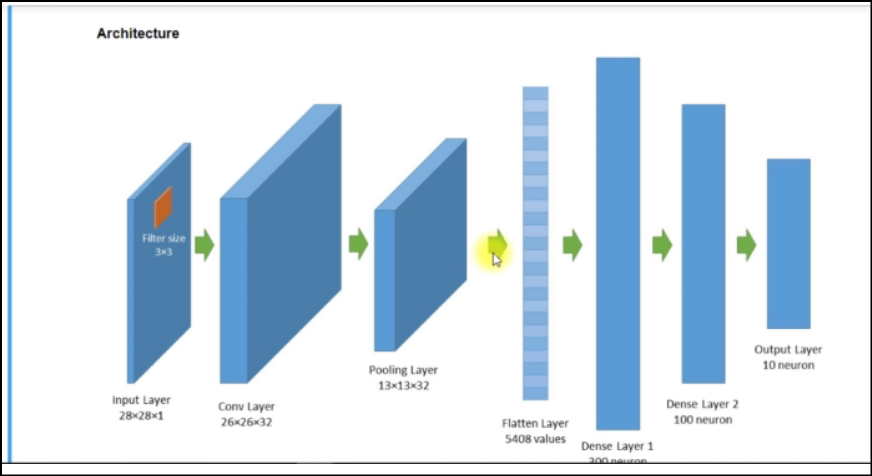

In [28]:
# create NN object using sequential API
model=keras.models.Sequential()

# add convolutional layer
model.add(keras.layers.Conv2D(filters=32,
                              # i.e. filter size
                             kernel_size=(3,3),
                              # i.e. number of steps each filter takes
                             strides=1,
                              # this padding ignores input borders
                              padding='valid',
                              activation='relu',
                              # FOR COLORED IMAGES ,28x28x3 instead
                              input_shape=(28,28,1)))

# max pooling taking max value from 2x2 grid
model.add(keras.layers.MaxPooling2D((2,2)))

# flatten into a single array
model.add(keras.layers.Flatten())

# add a hidden layer of 300 neurons with relu activation
model.add(keras.layers.Dense(300,activation='relu'))
# add a hidden layer of 100 neurons with relu activation
model.add(keras.layers.Dense(100,activation='relu'))

# add output layer of 10 neurons(there are 10 classes) with softmax activation 
model.add(keras.layers.Dense(10,activation='softmax'))


In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               1622700   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

- Param: 
    - refers to the number of parameters the model needs to tune
    

In [31]:
# setting parameters that are problem specific
model.compile(loss='sparse_categorical_crossentropy',
              # sgd refers to stochastic gradient descent
             optimizer='sgd',
             metrics=['accuracy'])

In [41]:
# load saved model
model = keras.models.load_model('CNNmodel.h5')

In [42]:
# using .fit method consecutively actually continues training the model where it was left off
model_history = model.fit(X_train,y_train,
                          validation_data=(X_valid,y_valid),
                          epochs=30)

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 30s 551us/sample - loss: 0.1335 - accuracy: 0.9528 - val_loss: 0.2452 - val_accuracy: 0.9126
Epoch 2/30
55000/55000 [==============================] - 44s 808us/sample - loss: 0.1274 - accuracy: 0.9545 - val_loss: 0.2488 - val_accuracy: 0.9128
Epoch 3/30
55000/55000 [==============================] - 42s 772us/sample - loss: 0.1232 - accuracy: 0.9559 - val_loss: 0.2314 - val_accuracy: 0.9176
Epoch 4/30
55000/55000 [==============================] - 43s 774us/sample - loss: 0.1178 - accuracy: 0.9579 - val_loss: 0.2513 - val_accuracy: 0.9088
Epoch 5/30
55000/55000 [==============================] - 44s 801us/sample - loss: 0.1124 - accuracy: 0.9610 - val_loss: 0.2370 - val_accuracy: 0.9156
Epoch 6/30
55000/55000 [==============================] - 43s 782us/sample - loss: 0.1072 - accuracy: 0.9620 - val_loss: 0.2353 - val_accuracy: 0.9176
Epoch 7/30
55000/55000 [=====================

In [33]:
# show model parameters
model_history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [34]:
# show the training progression 
model_history.history

{'loss': [0.7232647918701172,
  0.4789659946875139,
  0.4240220858747309,
  0.38848866054795006,
  0.36352404016581447,
  0.3416003832513636,
  0.3246729166767814,
  0.30834569490606134,
  0.2958024963920767,
  0.2845826054659757,
  0.2724606364792044,
  0.26324330543821506,
  0.2536492290626873,
  0.24500095049684698,
  0.23684471851587297,
  0.22951359150409698,
  0.22168787875717336,
  0.2143544225161726,
  0.2067171369996938,
  0.20066493109573016,
  0.19270263248140163,
  0.18695772215669806,
  0.18099661400209774,
  0.17436552574851297,
  0.1684124231062152,
  0.1619700433254242,
  0.1569283708691597,
  0.15059462025653234,
  0.14511815802075645,
  0.1394659092632207],
 'accuracy': [0.74454546,
  0.82796365,
  0.8478182,
  0.8587273,
  0.8691091,
  0.8766909,
  0.88205457,
  0.8868545,
  0.8913636,
  0.89494544,
  0.9003636,
  0.9024,
  0.9070182,
  0.91107273,
  0.91316366,
  0.9152,
  0.9185454,
  0.9208364,
  0.9242,
  0.9256,
  0.9288909,
  0.932,
  0.9329636,
  0.93654543,
 

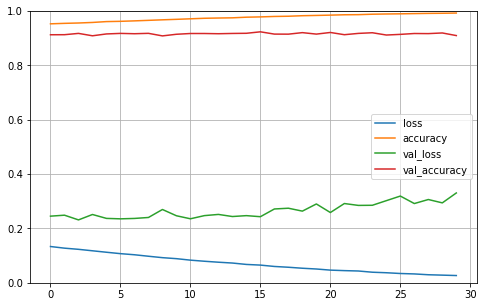

In [43]:
# visualise the training progression
# after 60 epochs the model is near 100% accuracy
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Evaluating performance

In [36]:
# 0.318 loss and accuracy of 0.889 
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 140us/sample - loss: 0.2543 - accuracy: 0.9121


[0.2543268059760332, 0.9121]

In [37]:
# making single probability predictions
y_proba = model.predict(X_test[:3])
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [38]:
# or we could make class predictions
y_pred = model.predict_classes(X_test[:3])
y_pred

array([9, 2, 1], dtype=int64)

Ankle boot


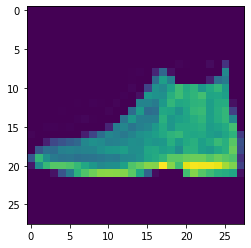

In [41]:
print(label_names[y_pred[0]])
plt.imshow(X_test[0])

Pullover


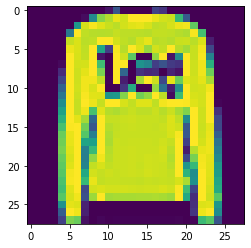

In [42]:
print(label_names[y_pred[1]])
plt.imshow(X_test[1])

Trouser


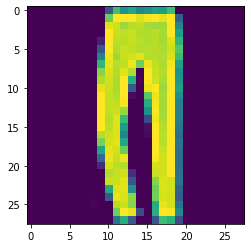

In [43]:
print(label_names[y_pred[2]])
plt.imshow(X_test[2])

# Saving and restoring

In [39]:
# save model
model.save('CNNmodel.h5')

In [40]:
# delete model
del model
keras.backend.clear_session()

In [41]:
# load model
model = keras.models.load_model('CNNmodel.h5')

In [57]:
# loaded model is the same as the model trained in previous session
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 109us/sample - loss: 0.3183 - accuracy: 0.8889


[0.3182890306711197, 0.8889]